## Using NLP and Machine Learning Models 

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from scipy.sparse import csr_matrix, lil_matrix

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# For multiclass classification
from sklearn.multiclass import OneVsRestClassifier

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('train.csv')
df['merged'] = df['TITLE']+" " + df['ABSTRACT']
df.drop(['ID','TITLE','ABSTRACT'], inplace = True, axis = 1)
df.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,merged
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...
3,0,0,1,0,0,0,A finite element approximation for the stochas...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...


In [5]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [6]:
df['clean_merged'] = df['merged'].apply(lambda x: clean_text(x))
df.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,merged,clean_merged
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...,reconstructing subject specific effect maps pr...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...,rotation invariance neural network rotation in...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,spherical polyharmonics and poisson kernels fo...
3,0,0,1,0,0,0,A finite element approximation for the stochas...,a finite element approximation for the stochas...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,comparative study of discrete wavelet transfor...


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['clean_merged'] = df['clean_merged'].apply(lambda x: remove_stopwords(x))
df.head()
                                                        

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,merged,clean_merged
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...,reconstructing subject specific effect maps pr...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...,rotation invariance neural network rotation in...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,spherical polyharmonics poisson kernels polyha...
3,0,0,1,0,0,0,A finite element approximation for the stochas...,finite element approximation stochastic maxwel...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,comparative study discrete wavelet transforms ...


d shape 20


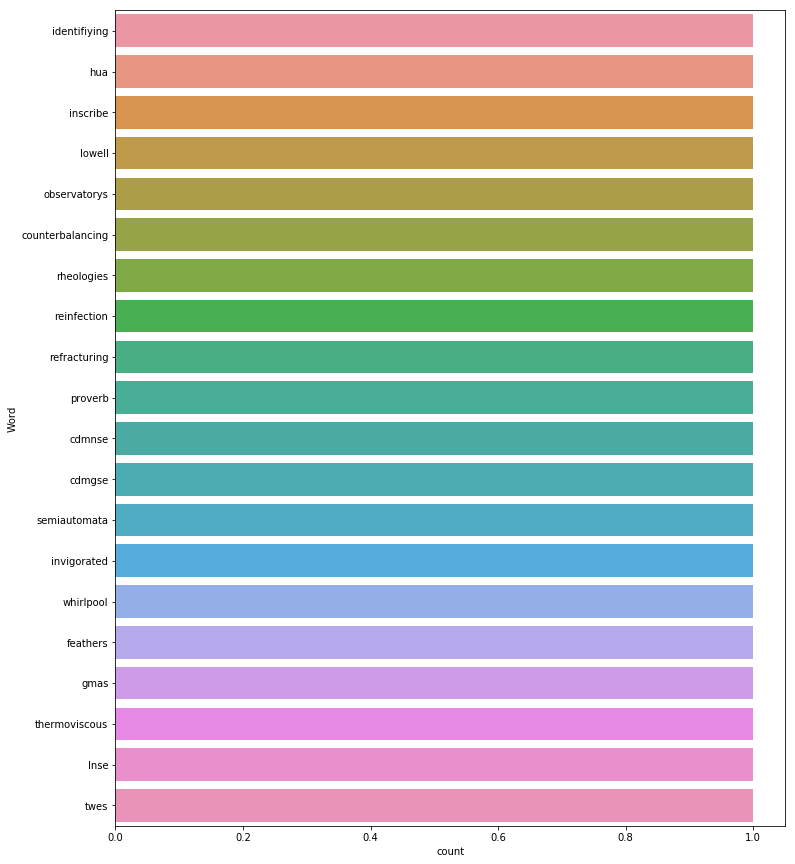

In [11]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 

    # selecting top 20 most frequent words 
    d = words_df.nsmallest(columns="count", n = terms) 
    print('d shape',len(d))
    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
    
freq_words(df['clean_merged'], 20)

In [12]:
y = df.iloc[:,0:6]
y.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,1,0,0


In [13]:
df.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,merged,clean_merged
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...,reconstructing subject specific effect maps pr...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...,rotation invariance neural network rotation in...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,spherical polyharmonics poisson kernels polyha...
3,0,0,1,0,0,0,A finite element approximation for the stochas...,finite element approximation stochastic maxwel...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,comparative study discrete wavelet transforms ...


In [14]:
df_new = df.iloc[:,7:]
df_new.head()

,clean_merged
0,reconstructing subject specific effect maps pr...
1,rotation invariance neural network rotation in...
2,spherical polyharmonics poisson kernels polyha...
3,finite element approximation stochastic maxwel...
4,comparative study discrete wavelet transforms ...


In [17]:
def call_test_data():
    test_df = pd.read_csv('test.csv')
    test_df['merged'] = test_df['TITLE'] + ' ' + test_df['ABSTRACT']
    test_df['clean_merged'] = test_df['merged'].apply(lambda x: clean_text(x))
    test_df['clean_merged'] = test_df['clean_merged'].apply(lambda x: remove_stopwords(x))
        
    test_df_new = test_df['clean_merged']
    return test_df_new

In [18]:
test_df = call_test_data().head()

0    closed form marginal likelihood gamma poisson ...
1    laboratory mid ir spectra equilibrated igneous...
2    case static amsdu aggregation wlans frame aggr...
3    gaia eso survey inner disk intermediate age op...
4    witness functions versus interpretation functi...
Name: clean_merged, dtype: object

In [20]:
df_new.head()

,clean_merged
0,reconstructing subject specific effect maps pr...
1,rotation invariance neural network rotation in...
2,spherical polyharmonics poisson kernels polyha...
3,finite element approximation stochastic maxwel...
4,comparative study discrete wavelet transforms ...


In [21]:
y.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,1,0,0


In [11]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [12]:
split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(df_new['merged'], y, test_size=0.1, random_state=9)

In [21]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [22]:
lr = LogisticRegression(C=2.0)
clf = OneVsRestClassifier(lr)
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

C:\Users\user\Anaconda3\envs\computervisionenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [17]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)
# evaluate performance
print('F1 score',f1_score(yval, y_pred, average="micro"))
print('Accuracy',accuracy_score(yval, y_pred))

F1 score 0.8186476439264543
Accuracy 0.6700834326579261


In [42]:
def train_classifier(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    """
      X_train, y_train — training data
      return: trained classifier
    """
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l2', dual=False, solver='sag')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model

In [49]:
# Logistic Regression
%time classifier_tfidf = train_classifier(xtrain_tfidf, ytrain, C=2, model='lr')
y_test_predicted_labels_tfidf = classifier_tfidf.predict(xval_tfidf)
# evaluate performance
print('F1 score',f1_score(yval, y_test_predicted_labels_tfidf, average="micro"))
print('Accuracy',accuracy_score(yval, y_test_predicted_labels_tfidf))

Wall time: 12.4 s
F1 score 0.8189308681672025
Accuracy 0.6700834326579261


In [44]:
# SVM
%time classifier_tfidf = train_classifier(xtrain_tfidf, ytrain, C=2.0, model='svm')
y_test_predicted_labels_tfidf = classifier_tfidf.predict(xval_tfidf)
# evaluate performance
print('F1 score',f1_score(yval, y_test_predicted_labels_tfidf, average="micro"))
print('Accuracy',accuracy_score(yval, y_test_predicted_labels_tfidf))

Wall time: 51.2 s
F1 score 0.784688995215311
Accuracy 0.6131108462455304


In [38]:
# Naive Bayes
%time classifier_tfidf = train_classifier(xtrain_tfidf, ytrain, C=1.0, model='nbayes')
y_test_predicted_labels_tfidf = classifier_tfidf.predict(xval_tfidf)
# evaluate performance
print('F1 score',f1_score(yval, y_test_predicted_labels_tfidf, average="micro"))
print('Accuracy',accuracy_score(yval, y_test_predicted_labels_tfidf))

Wall time: 299 ms
F1 score 0.806028196402528
Accuracy 0.6376638855780691


## Predictions on testing data

In [18]:
test_df = pd.read_csv('test.csv')
test_df.drop('ID', axis = 1, inplace = True)

test_df['clean_title'] = test_df['TITLE'].apply(lambda x: clean_text(x))
test_df['clean_abstract'] = test_df['ABSTRACT'].apply(lambda x: clean_text(x))
test_df['clean_title'] = test_df['clean_title'].apply(lambda x: remove_stopwords(x))
test_df['clean_abstract'] = test_df['clean_abstract'].apply(lambda x: remove_stopwords(x))
test_df.drop(['TITLE','ABSTRACT'], axis =1, inplace = True)
test_df['merged'] = test_df['clean_title'] + " " +test_df['clean_abstract']
test_df.head()

,clean_title,clean_abstract,merged
0,closed form marginal likelihood gamma poisson ...,present novel understandings gamma poisson gap...,closed form marginal likelihood gamma poisson ...
1,laboratory mid ir spectra equilibrated igneous...,meteorites contain minerals solar system aster...,laboratory mid ir spectra equilibrated igneous...
2,case static amsdu aggregation wlans,frame aggregation mechanism multiple frames co...,case static amsdu aggregation wlans frame aggr...
3,gaia eso survey inner disk intermediate age op...,milky way open clusters diverse terms age chem...,gaia eso survey inner disk intermediate age op...
4,witness functions versus interpretation functi...,proving cryptographic protocol correct secrecy...,witness functions versus interpretation functi...


In [19]:
test_df_new = test_df['merged']
test_df_new.head()

0    closed form marginal likelihood gamma poisson ...
1    laboratory mid ir spectra equilibrated igneous...
2    case static amsdu aggregation wlans frame aggr...
3    gaia eso survey inner disk intermediate age op...
4    witness functions versus interpretation functi...
Name: merged, dtype: object

In [25]:
test_x_tfidf = tfidf_vectorizer.transform(test_df_new)
y_test_pred = clf.predict(test_x_tfidf)
ans = pd.DataFrame(y_test_pred, columns = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance'])
ans.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [26]:
ans.to_csv('answer_lr.csv')

In [ ]:
# Gives 0.815 f1_score using Logistic regression and Tfidf